# Discrete Probability Distributions
------

1. [StatTreak Overview](http://stattrek.com/probability-distributions/probability-distribution.aspx)
2. [Common Probability Distributions: The Data Scientist’s Crib Sheet](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)
3. [Scipy Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html)
  -  [scipy distribution functions](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)
4. [R E-Tutorial Introduction to Stats](http://www.r-tutor.com/elementary-statistics/probability-distributions)
5. Truncated distributions.
  -  [How to sample truncated distributions](https://www.google.co.uk/search?client=firefox-b-ab&dcr=0&ei=1ShNWuXYIM3IwALT_orgCQ&q=truncated+distribution+python+tutorial&oq=truncated+distribution+python+tut&gs_l=psy-ab.3.0.33i21k1j33i160k1.14122.16124.0.17521.11.11.0.0.0.0.164.1137.6j5.11.0....0...1c.1.64.psy-ab..0.11.1129...0j0i22i30k1.0.chuX-eNenpo)
  
  
In this notebook we will demonstrate common probability distributions and there implementations in SciPy.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Uniform
The simplest probability distribution occurs when all of the values of a random variable occur with equal probability. This probability distribution is called the uniform distribution.

The random variable X can assume k different values.

$$P(X = {x_k}) =1/k$$

A. Suppose a die is tossed. What is the probability that the die will land on 5? = pdf

B. What is the probability that the die will land on a number that is 5 or less? = cdf

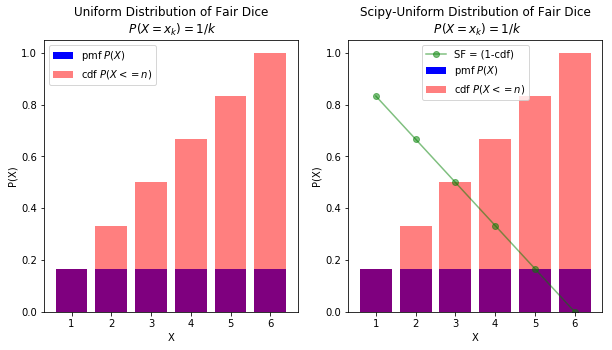

In [2]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))

dice = np.arange(1,7,1)
k = len(dice)
pmf = [1/k for X in dice]
cdf = np.cumsum(pmf)

ax1.set_title('Uniform Distribution of Fair Dice\n $P(X = {x_k}) = 1/k$')
ax1.bar(dice, pmf, alpha=1, color='blue', label='pmf $P(X)$')
ax1.bar(dice, cdf, alpha=0.5, color='red', label='cdf $P(X<=n)$')

from scipy.stats import randint
low,high = 1,7
pmf = randint.pmf(dice,low,high)
cdf = randint.cdf(dice,low,high)
sf  = randint.sf(dice,low,high) # survival function is 1-cdf

ax2.set_title('Scipy-Uniform Distribution of Fair Dice\n $P(X = {x_k}) = 1/k$')
ax2.bar(dice, pmf, alpha=1, color='blue', label='pmf $P(X)$')
ax2.bar(dice, cdf, alpha=0.5, color='red', label='cdf $P(X<=n)$')
ax2.plot(dice, sf, alpha=0.5, color='green', label='SF = (1-cdf)',  marker='o')

for ax in [ax1,ax2]:
    ax.set_ylabel('P(X)')
    ax.set_xlabel('X')
    ax.legend();

## Bernoulli 
A distribution for random variables with a binary outcome, such as a coin toss.

$P(X) = p$

$P(Y) = 1-p$

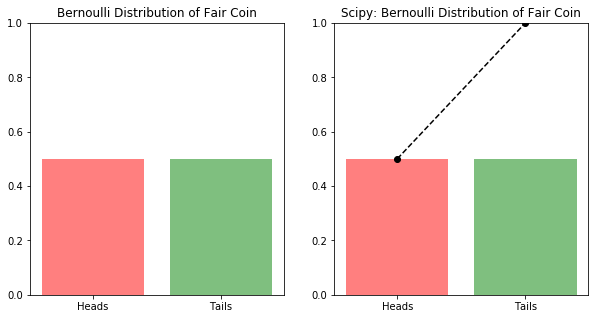

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))


x = [0,1]                               
pHead = 0.5
pTail = 1.0 - pHead
ax1.set_title('Bernoulli Distribution of Fair Coin')
ax1.bar(x, [pHead, pTail], alpha=0.5, color=['red', 'green'])

from scipy.stats import bernoulli
pmf = bernoulli.pmf(x,pHead)
cdf = bernoulli.cdf(x,pHead)
ax2.set_title('Scipy: Bernoulli Distribution of Fair Coin')
ax2.bar(x, pmf, alpha=0.5, color=['red', 'green'])
ax2.plot(x, cdf, 'k--', marker='o')

for ax in [ax1,ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(['Heads', 'Tails'])
    ax.set_ylim(0,1)


## Binomial
[Examples](http://www.real-statistics.com/binomial-and-related-distributions/hypothesis-testing-binomial-distribution/)<br>
[1 & 2-tail tests](http://www.real-statistics.com/binomial-and-related-distributions/statistical-power-binomial-distribution/)<br>
A binomial distribution is given by the product of multiple bernoulli distributions - termed trials.

E.g. 1 If you toss a coin 20 times (trials), how many times may it come up heads?

E.g. 2 Imagine a bucket with equal numbers of red and blue marbles. Draw a marble, note its colour and place it back in the bucket. Repeat for a given number of times. The Binomial distribution describes how likely you are to have drawn $X$ red or blue marbles. 
##### Assumptions:
 - Each trial is independent.
 - The probability of sucess / failure is constant.

| |description|
|----|----|
|$x$|number of sucesses in a binomial experiment. 
|$n$|number of trials in a binomial experiment. 
|$P$|probability of sucess in a single trials.
|$Q$|probability of failure in a single trial $(1-P)$.
|$nl$|n factorial

$$b(x:n,P)$$ Binomial probability - the probability that an $n$ trial experiment yields exactly $x$ sucesses, when the probability of sucess in each trial is $P$.

For 30 trials with P = 0.35:
if >15 successes occur the coin is biased at 95%
if >17 sucesses occur the coin is biased at 99%

If the coin or "process" is proven to be biased,
it is sifnificantly different from the expectation based on $P$


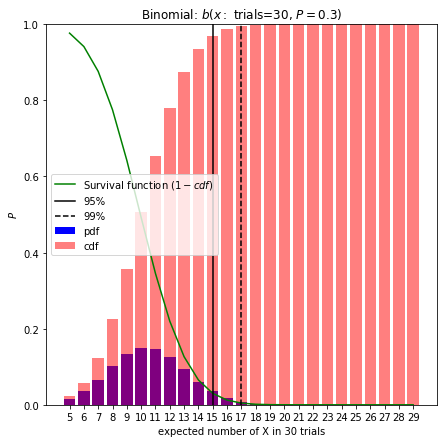

In [189]:
fig, ax1, = plt.subplots(1,1, figsize=(7,7))

from scipy.stats import binom
p = 0.35
n = 30

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(1, n, p))
pmf = binom.pmf(x, n, p)
cdf = binom.cdf(x, n, p)
sf = binom.sf(x, n, p)

ax1.set_title('Binomial: $b(x:$ trials=$%s$, $P=%.1f)$' %(n, p))
ax1.bar(x, pmf, color='blue', label='pdf')
ax1.bar(x, cdf, color='red', alpha=0.5, label='cdf')
ax1.plot(x,sf, color='green', label='Survival function $(1-cdf)$')

ax1.plot([x[np.where((1.0 - cdf < 0.05) & (1.0 - cdf > 0.01))[0][0]]]*2, [0, 1],
        'k-', label='95%')

ax1.plot([x[np.where((1.0 - cdf) < 0.01)[0][0]]]*2, [0, 1],
        'k--', label='99%')

ax1.set_xticks(x)
ax1.set_ylim(0,1)
ax1.set_xlabel('expected number of X in %s trials' %n)
ax1.set_ylabel('$P$')
ax1.legend();

print('For %d trials with P = %.2f:\nif >%d successes occur the coin is biased at 95%%\nif >%d sucesses occur the coin is biased at 99%%'
      %(n,p,
        x[np.where((1.0 - cdf < 0.05) & (1.0 - cdf > 0.01))[0][0]],
        x[np.where((1.0 - cdf) < 0.01)[0][0]]))
print('\nIf the coin or "process" is proven to be biased,\nit is sifnificantly different from the expectation based on $P$')

## Hypogeometric Distribution